### Problem Statement:

<ol>
    <li><b>age:</b> displays the age of the individual.</li>
    <li><b>sex:</b> displays the gender of the individual using the following format :
    <ul>
        <li>1 = male</li>
        <li>0 = female</li>
        </ul></li>
    <li><b>cp (Chest-Pain Type):</b> displays the type of chest-pain experienced by the individual using the following format :
    <ul>
         <li>0 = typical angina</li>
         <li>1 = atypical angina</li>
         <li>2= non — anginal pain</li>
         <li>3 = asymptotic</li>
    </ul></li>
    <li><b>trestbps(Resting Blood Pressure):</b> displays the resting blood pressure value of an individual in mmHg (unit)</li>
    <li><b>chol(Serum Cholestrol):</b> displays the serum cholesterol in mg/dl (unit)</li>
    <li><b>fbs (Fasting Blood Sugar):</b> compares the fasting blood sugar value of an individual with 120mg/dl.
        <ul><li>If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false)</li></ul></li>
    <li><b>restecg (Resting ECG):</b> displays resting electrocardiographic results
    <ul>
        <li>0 = normal</li>
        <li>1 = having ST-T wave abnormality</li>
        <li>2 = left ventricular hyperthrophy</li>
    </ul>
        </li>
    <li><b>thalach(Max Heart Rate Achieved):</b> displays the max heart rate achieved by an individual.</li>
    <li><b>exang (Exercise induced angina):</b><ul>
        <li>1 = yes</li>
        <li>0 = no</li>
        </ul>
    </li>
    <li><b>oldpeak (ST depression induced by exercise relative to rest):</b> displays the value which is an integer or float.</li>
    <li><b>slope (Peak exercise ST segment) :</b>
        <ul><li>0 = upsloping</li>
            <li>1 = flat</li>
            <li>2 = downsloping</li></ul></li>
    <li><b>ca (Number of major vessels (0–3) colored by flourosopy):</b> displays the value as integer or float.</li>
<li><b>thal :</b> displays the thalassemia (is an inherited blood disorder that causes your body to have less hemoglobin than normal) :
    <ul>
        <li>
            0 = normal</li>
        <li>1 = fixed defect</li>
        <li>2 = reversible defect</li></ul></li>
<li><b>target (Diagnosis of heart disease):</b> Displays whether the individual is suffering from heart disease or not :
    <ul><li>0 = absence</li>
        <li>1 = present.</li></ul></li></ol>

### Steps involved:
1. Importing libraries
2. Exploratory data analysis
    * Data preprocessing
    * Data visualization
3. Modelling 
     * Logistic Regression
     * K-Nearest Neighbour
     * Random Forest 
4. Feature Importance
5. Saving the model
     * Pickle - approach 1
     * Pickle - approach 2

In [1]:
# Import all the tools we need

# Regular EDA(Exploratory data analysis) and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We want our plots to appear inside the notebook
%matplotlib inline 

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report

#Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")

#Pandas-Profiling helps to build a widget that can be used to better visualise it 
#Pandas profiling is an open source Python module with which we can quickly do an exploratory data analysis with just a few lines of code.
#In short, what pandas profiling does is save us all the work of visualizing and understanding the distribution of each variable.

### Importing the dataset

In [2]:
df=pd.read_csv('heart.csv')

### Shape of the dataset (Rows, Columns)

In [3]:
df.shape

(303, 14)

### Head of the dataset

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


<br><br>
# Exploratory Data analysis
<br>

### Renaming columns

In [5]:
df.rename(columns ={'age':'Age','sex':'Sex','cp':'Chest_pain','trestbps':'Resting_blood_pressure','chol':'Cholesterol','fbs':'Fasting_blood_sugar',
                    'restecg':'ECG_results','thalach':'Maximum_heart_rate','exang':'Exercise_induced_angina','oldpeak':'ST_depression','slope':'ST_slope','ca':'Major_vessels',
                   'thal':'Thalassemia_types','target':'Heart_disease'}, inplace = True)

In [6]:
# View of the Renamed Dataframe
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Information about the data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      303 non-null    int64  
 1   Sex                      303 non-null    int64  
 2   Chest_pain               303 non-null    int64  
 3   Resting_blood_pressure   303 non-null    int64  
 4   Cholesterol              303 non-null    int64  
 5   Fasting_blood_sugar      303 non-null    int64  
 6   ECG_results              303 non-null    int64  
 7   Maximum_heart_rate       303 non-null    int64  
 8   Exercise_induced_angina  303 non-null    int64  
 9   ST_depression            303 non-null    float64
 10  ST_slope                 303 non-null    int64  
 11  Major_vessels            303 non-null    int64  
 12  Thalassemia_types        303 non-null    int64  
 13  Heart_disease            303 non-null    int64  
dtypes: float64(1), int64(13)
m

### Description about the dataset

In [8]:
df.describe()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Are there any missing values?

In [9]:
df.isna().sum() 

Age                        0
Sex                        0
Chest_pain                 0
Resting_blood_pressure     0
Cholesterol                0
Fasting_blood_sugar        0
ECG_results                0
Maximum_heart_rate         0
Exercise_induced_angina    0
ST_depression              0
ST_slope                   0
Major_vessels              0
Thalassemia_types          0
Heart_disease              0
dtype: int64

### Correlation matrix & Matrix Visualisation

In [10]:
df.corr()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
Age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
Sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
Chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
Resting_blood_pressure,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
Cholesterol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
Fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
ECG_results,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
Maximum_heart_rate,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
Exercise_induced_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
ST_depression,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


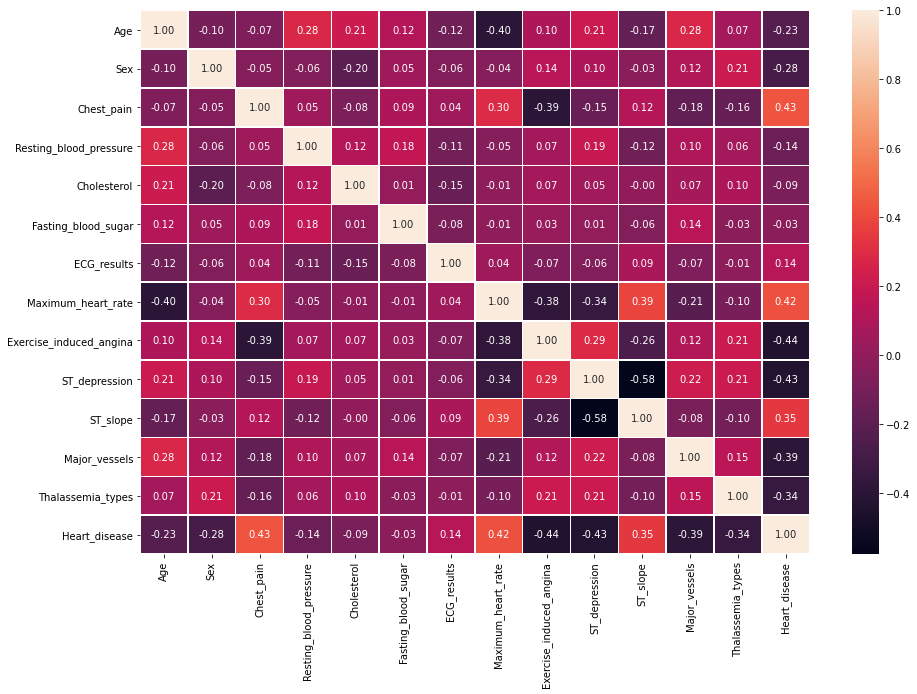

In [11]:
# Let's make our correlation matrix visual
corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
               annot=True,
               linewidths=0.5,
               fmt=".2f"
              )

### Target variable (Heart Disease-- 0 (absence) , 1 (present))

In [12]:
# Let's find out how many of each class are

df['Heart_disease'].value_counts()
# from below output we ca draw our inference that this is close to "balanced dataset"

1    165
0    138
Name: Heart_disease, dtype: int64

In [13]:
#Representation of Target variable in Percentage

countNoDisease = len(df[df.Heart_disease == 0])
countHaveDisease = len(df[df.Heart_disease == 1])
print("Percentage of Patients Haven't Heart Disease: {:.2f}%".format((countNoDisease / (len(df.Heart_disease))*100)))
print("Percentage of Patients Have Heart Disease: {:.2f}%".format((countHaveDisease / (len(df.Heart_disease))*100)))

Percentage of Patients Haven't Heart Disease: 45.54%
Percentage of Patients Have Heart Disease: 54.46%


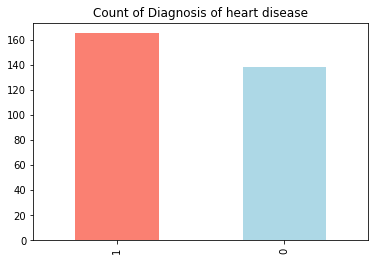

In [14]:
#Understanding the balancing of the data visually

df['Heart_disease'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of Diagnosis of heart disease");


**interpretation: The above plot shows the count of population having disease and not having disease with respect to sex and the count of having disease is greater**

### Heart Disease Frequency vs Sex

In [15]:
# Male and Female

df['Sex'].value_counts()

1    207
0     96
Name: Sex, dtype: int64

In [16]:
#Compare Target column i.e. Heart Disease with Sex Column

pd.crosstab(df['Heart_disease'],df['Sex'])

Sex,0,1
Heart_disease,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

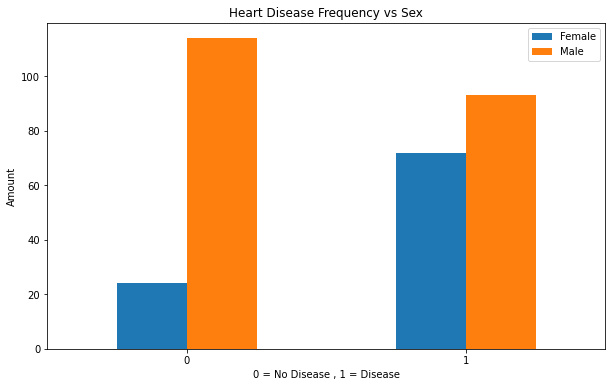

In [17]:
#Create a plot for crosstab

pd.crosstab(df['Heart_disease'],df['Sex']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Sex")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)

**Interpretation: The above plot shows the ratio of population having disease and not having disease with respect to sex**

<br>

### Age vs. Max. Heart Rate for Heart Disease

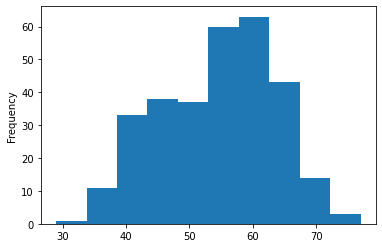

In [18]:
#Check the distribution of the age column with a histogram

df['Age'].plot(kind='hist');

In [19]:
df['Maximum_heart_rate'].value_counts()

#Here Length denotes how many different types of categories are there

162    11
160     9
163     9
173     8
152     8
       ..
129     1
128     1
127     1
124     1
71      1
Name: Maximum_heart_rate, Length: 91, dtype: int64

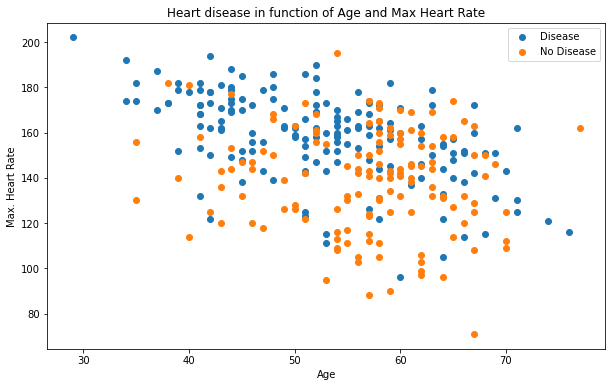

In [20]:
plt.figure(figsize=(10,6))

#Target is equal to 1
plt.scatter(x = df[df['Heart_disease']==1]['Age'], y = df.Maximum_heart_rate[df.Heart_disease==1])

#Target is equal to 0
plt.scatter(x = df[df['Heart_disease']==0]['Age'], y = df.Maximum_heart_rate[df.Heart_disease==0],);

#Adding some helpful information
plt.title("Heart disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max. Heart Rate")
plt.legend(["Disease","No Disease"])

**Interpretation:<br>
The above plot shows maximum heart rate of population with and without disease with respect to age**

<br>

### Heart Disease Frequency per Chest Pain Type

In [21]:
# Relation of Heart Disease with Chest Pain Type

pd.crosstab(df['Chest_pain'],df['Heart_disease'])

Heart_disease,0,1
Chest_pain,,
0,104,39
1,9,41
2,18,69
3,7,16


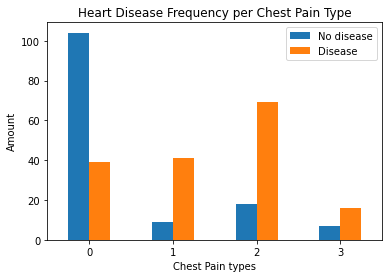

In [22]:
# Make the crosstab more visual

pd.crosstab(df['Chest_pain'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each chest pain type for the population having and not having disease where type 0 is greater and where the population is more prone to not having disese**

<br>

### Resting Blood Pressure

<AxesSubplot:ylabel='Density'>

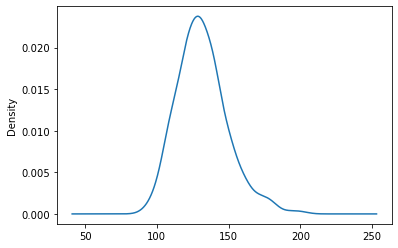

In [23]:
df['Resting_blood_pressure'].plot(kind='kde')

**Interpretation:<br>
The above plot shows the density of Resting blood pressure and the maximum density is around 120-140**

### Heart Disease vs Fasting Blood Sugar

In [24]:
df['Fasting_blood_sugar'].value_counts()

0    258
1     45
Name: Fasting_blood_sugar, dtype: int64

In [25]:
#Compare Target column i.e. Heart Disease with Fasting Blood Sugar Column

pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar'])

Fasting_blood_sugar,0,1
Heart_disease,,
0,116,22
1,142,23


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

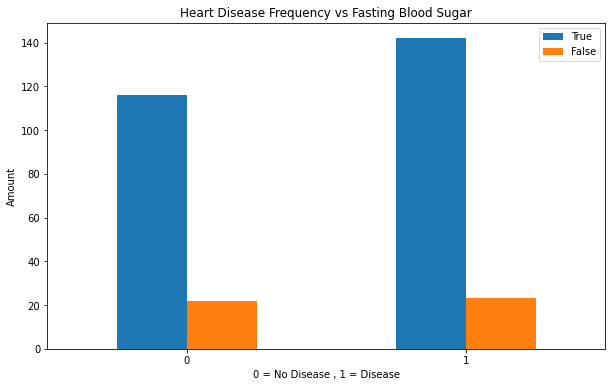

In [26]:
#Create a plot for crosstab

pd.crosstab(df['Heart_disease'],df['Fasting_blood_sugar']).plot(kind="bar",figsize=(10,6));
plt.title("Heart Disease Frequency vs Fasting Blood Sugar")
plt.xlabel("0 = No Disease , 1 = Disease")
plt.ylabel("Amount")
plt.legend(["True","False"])
plt.xticks(rotation=0)

**Interpretation:<br> 
The above plot shows that the sugar level does not contribute to having or not having the heart disease**

### Heart Disease vs ECG Results

In [27]:
df['ECG_results'].value_counts()

1    152
0    147
2      4
Name: ECG_results, dtype: int64

In [28]:
#Compare Target column i.e. Heart Disease with ECG Results

pd.crosstab(df['Heart_disease'],df['ECG_results'])

ECG_results,0,1,2
Heart_disease,,,
0,79,56,3
1,68,96,1


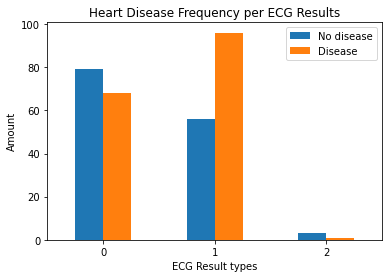

In [29]:
# Make the crosstab more visual

pd.crosstab(df['ECG_results'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per ECG Results")
plt.xlabel("ECG Result types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each ECG type for the population having and not having disease where type 1 is greater and more prone to having disease**

<br>

### Heart Disease vs Thalassemia types

In [30]:
df['Thalassemia_types'].value_counts()

2    166
3    117
1     18
0      2
Name: Thalassemia_types, dtype: int64

In [31]:
#Compare Target column i.e. Heart Disease with Thalassemia

pd.crosstab(df['Heart_disease'],df['Thalassemia_types'])

Thalassemia_types,0,1,2,3
Heart_disease,,,,
0,1,12,36,89
1,1,6,130,28


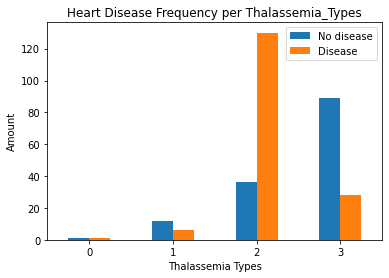

In [32]:
# Make the crosstab more visual

pd.crosstab(df['Thalassemia_types'],df['Heart_disease']).plot(kind='bar')
plt.title("Heart Disease Frequency per Thalassemia_Types")
plt.xlabel("Thalassemia Types")
plt.ylabel("Amount")
plt.legend(['No disease','Disease'])
plt.xticks(rotation=0);

**Interpretation:<br>
The above plot shows frequency of each Thalassemia type for the population having and not having disease where type 2 is greater and is more prone to having disease**

<br><br>
## 5. Modelling
 We must experiment with the models, trying 3 different models and getting the results from them and comparing them later

In [33]:
df.head()

#We will be taking independent variables to predict dependent variables

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Split data using Train-Test Split

In [34]:
X=df.drop('Heart_disease',axis=1)
y=df['Heart_disease']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

<br>
Now we have got our data split into training and test sets, it is time to build a Machine Learning model.

We will train it (find the patterns) on the training set.

And we will test it (use the patterns) on the test set.

**We're going to try 3 different Machine Learning models:**
1. Logistic Regression

2. K-Nearest Neighbours Classifier

3. Random Forest Classifier

## 1. Logistic Regression

In [35]:
lr=LogisticRegression()

In [36]:
lr.fit(X_train,y_train)

LogisticRegression()

In [37]:
#Training score

lr.score(X_train,y_train)

0.859504132231405

In [38]:
#Prediction of the test variable

lr_y_preds=lr.predict(X_test)

In [39]:
#Testing accuracy

lr.score(X_test,y_test)

0.8852459016393442

### Confusion Matrix

In [40]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap
    """
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),annot=True,cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted Label")


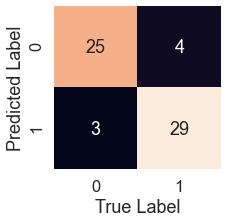

In [41]:
plot_conf_mat(y_test,lr_y_preds)

### Classification Report

In [42]:
print(classification_report(y_test,lr_y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## 2. K-Nearest Neighbour

In [43]:
knn=KNeighborsClassifier()

In [44]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
#Training score

knn.score(X_train,y_train)

0.7603305785123967

In [46]:
#Prediction of the test variable

knn_y_preds=knn.predict(X_test)

In [47]:
#Testing accuracy

knn.score(X_test,y_test)

0.6885245901639344

### Confusion Matrix

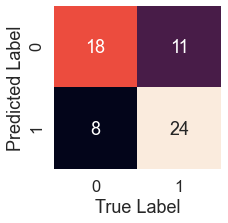

In [48]:
plot_conf_mat(y_test,knn_y_preds)

### Classification Report

In [49]:
print(classification_report(y_test,knn_y_preds))

              precision    recall  f1-score   support

           0       0.69      0.62      0.65        29
           1       0.69      0.75      0.72        32

    accuracy                           0.69        61
   macro avg       0.69      0.69      0.69        61
weighted avg       0.69      0.69      0.69        61



## 3. Random Forest

In [50]:
rf=RandomForestClassifier()

In [51]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
#Training score

rf.score(X_train,y_train)

1.0

In [53]:
#Prediction of the test variable

rf_y_preds=rf.predict(X_test)

In [54]:
#Testing accuracy

rf.score(X_test,y_test)

0.8524590163934426

### Confusion Matrix

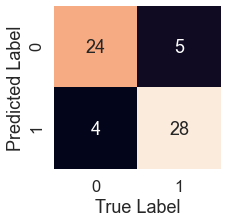

In [55]:
plot_conf_mat(y_test,rf_y_preds)

### Classification Report

In [56]:
print(classification_report(y_test,rf_y_preds))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84        29
           1       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



<br><br>
### Different Model Scores (accuracy)

In [57]:
model_scores={'Logistic Regression':lr.score(X_test,y_test),
             'KNN':knn.score(X_test,y_test),
             'Random Forest':rf.score(X_test,y_test)}

In [58]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8524590163934426}

## Model Comparison

In [59]:
#Based on accuracy
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random Forest
accuracy,0.885246,0.688525,0.852459


<AxesSubplot:>

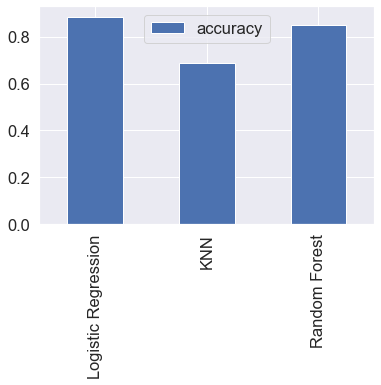

In [60]:
model_compare.T.plot(kind='bar') # (T is here for transpose)

<AxesSubplot:>

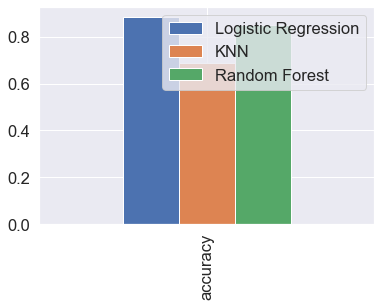

In [61]:
model_compare.plot(kind='bar') # (Not transposing the legends and y axis)

In [62]:
# These coef's tell how much and in what way did each one of it contribute to predicting the target variable

feature_dict=dict(zip(df.columns,list(lr.coef_[0])))
feature_dict

#This is a type of Model driven Exploratory data analysis

{'Age': 0.01409301010302416,
 'Sex': -1.1171330121035723,
 'Chest_pain': 0.7820432585712037,
 'Resting_blood_pressure': -0.011443718525467671,
 'Cholesterol': -0.0020327714679628816,
 'Fasting_blood_sugar': 0.0013833731696233054,
 'ECG_results': 0.48266918306135387,
 'Maximum_heart_rate': 0.02581627056606426,
 'Exercise_induced_angina': -0.7791502662416561,
 'ST_depression': -0.6953630277060603,
 'ST_slope': 0.5828033090398139,
 'Major_vessels': -0.7547448179188959,
 'Thalassemia_types': -0.9692382003758335}

<AxesSubplot:title={'center':'Feature Importance'}, ylabel='Frequency'>

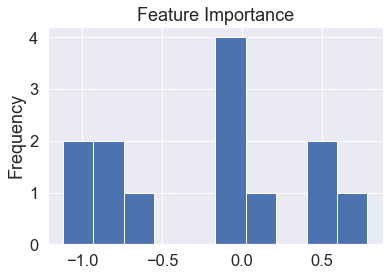

In [63]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="hist",legend=False,title="Feature Importance")

<AxesSubplot:title={'center':'Feature Importance'}>

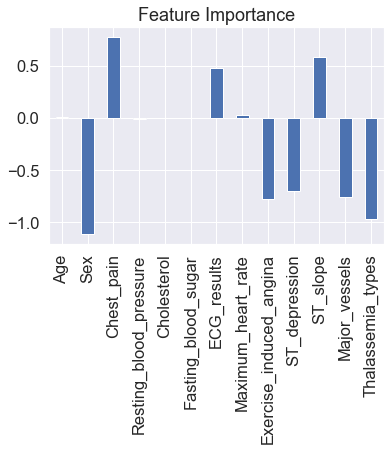

In [64]:
#Visualize feature importance

feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

## Saving model

In [65]:
import pickle
 
# Save the trained model as a pickle string.
saved_model = pickle.dumps(lr)
 
# Load the pickled model
lr_from_pickle = pickle.loads(saved_model)
 
# Use the loaded pickled model to make predictions
lr_from_pickle.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### Another method

In [66]:
# create an iterator object with write permission - model.pkl
with open('heart_attack_prediction.pkl', 'wb') as files:
    pickle.dump(lr, files)

In [67]:
 # load saved model
with open('heart_attack_prediction.pkl' , 'rb') as f:
    model = pickle.load(f)

In [68]:
# check prediction
# lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) # similar

lr.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [69]:
df.head()

,Age,Sex,Chest_pain,Resting_blood_pressure,Cholesterol,Fasting_blood_sugar,ECG_results,Maximum_heart_rate,Exercise_induced_angina,ST_depression,ST_slope,Major_vessels,Thalassemia_types,Heart_disease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [70]:
# putting datapoints in the model it will either return 0 or 1 i.e. person having heart disease or not
lr.predict([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]]) 

array([1], dtype=int64)